In [ ]:
!pip install yfinance

In [ ]:
!pip install plotly_express

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = yf.download(['AAPL', 'KO', 'JNJ', 'AXP', 'MCD',
                    'WMT', 'ORCL', 'NKE', 'MSFT', 'CAT'], period='4mo')

[*********************100%%**********************]  10 of 10 completed


Обоснование: были выбраны акции именно этих компаний, поскольку они входят в топ голубых фишек.


Расшифровки аббревиатур акций:
* AAPL -- Apple
* KO -- Coca-Cola
* JNJ -- Johnson & Johnson
* AXP -- American Express
* MCD -- McDonald's
* WMT -- Walmart
* ORCL -- Oracle
* NKE -- Nike
* MSFT -- Microsoft
* CAT -- Caterpillar

In [ ]:
closeData = data.Close

In [ ]:
closeData.head()

,AAPL,AXP,CAT,JNJ,KO,MCD,MSFT,NKE,ORCL,WMT
Date,,,,,,,,,,
2023-08-21,175.839996,160.880005,272.750000,167.350006,60.430000,280.040009,321.880005,102.860001,116.589996,157.509995
2023-08-22,177.229996,159.080002,270.200012,166.020004,60.060001,280.309998,322.459991,101.459999,116.540001,157.009995
2023-08-23,181.119995,159.440002,273.029999,164.529999,60.270000,281.869995,327.000000,98.750000,117.839996,158.100006
2023-08-24,176.380005,157.789993,269.299988,165.089996,60.110001,282.350006,319.970001,97.629997,112.910004,156.889999
2023-08-25,178.610001,158.320007,272.559998,166.250000,60.389999,284.579987,322.980011,98.839996,116.059998,157.820007


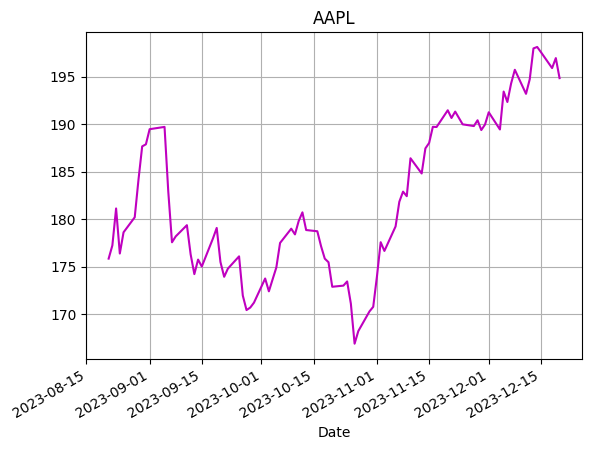

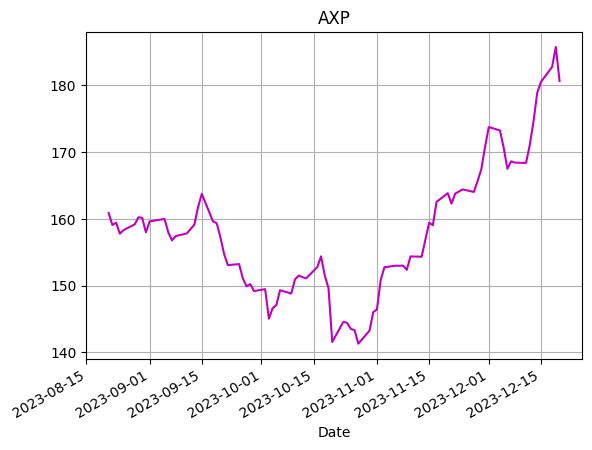

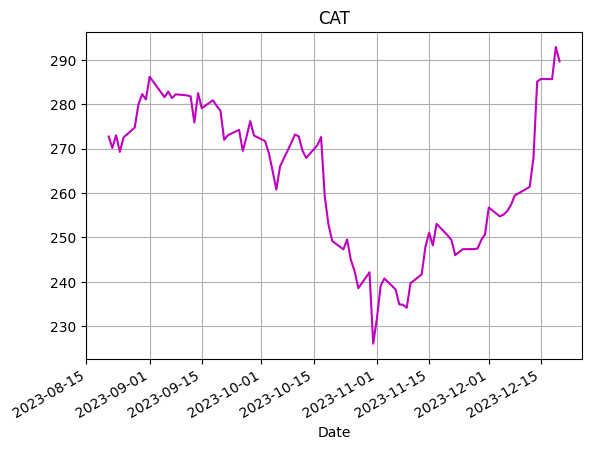

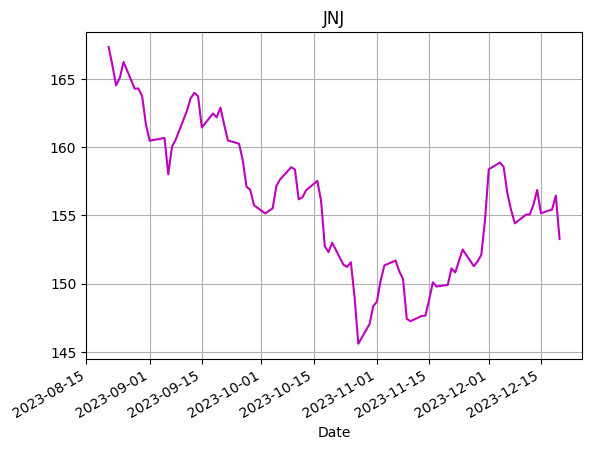

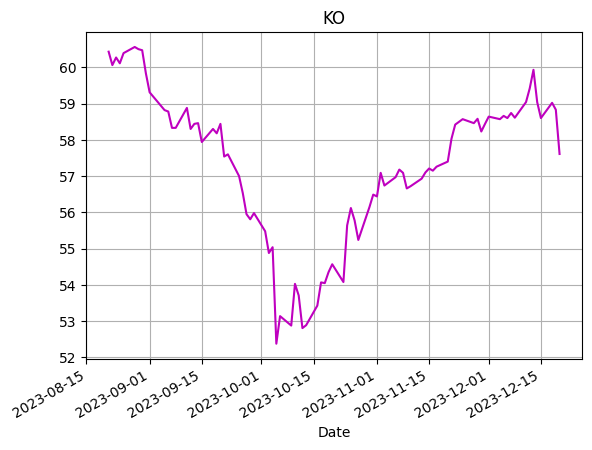

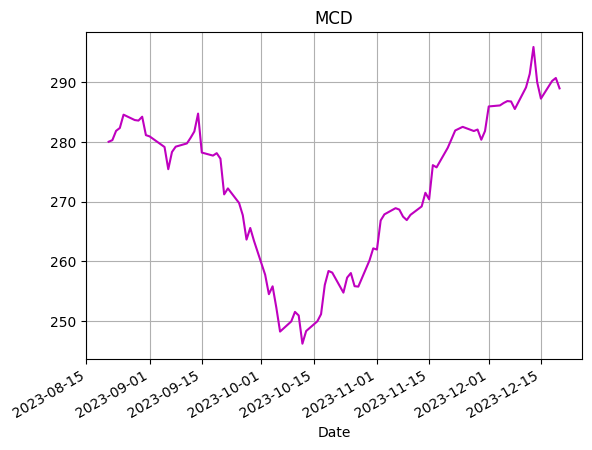

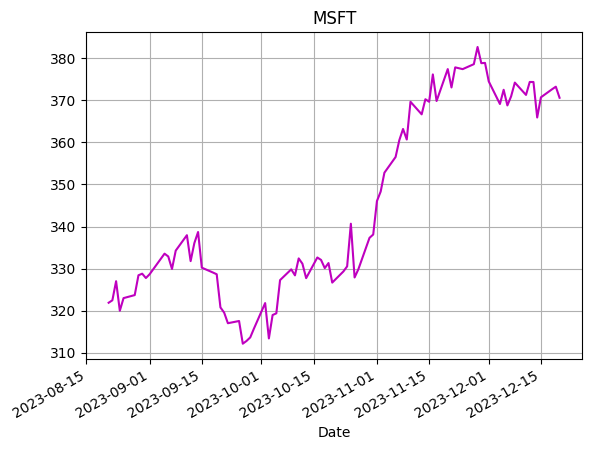

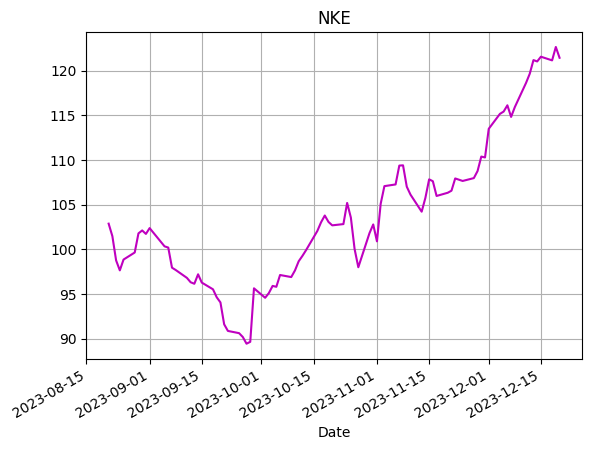

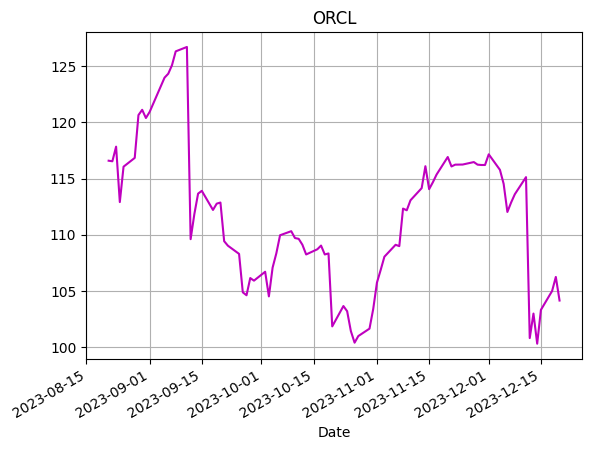

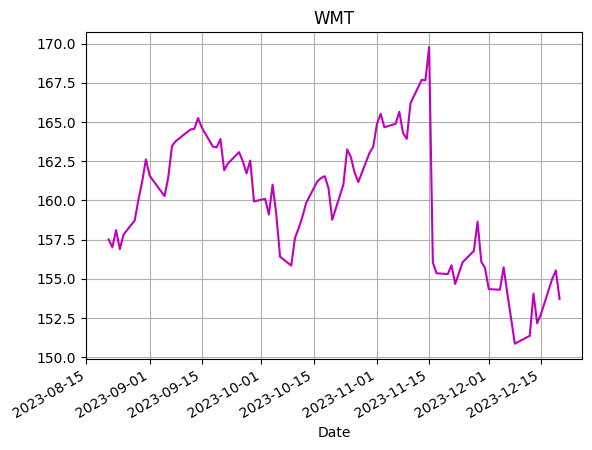

In [ ]:
# Дневные курсы закрытия
for name in closeData.columns:
  closeData[name].plot(c='m')
  plt.grid()
  plt.title(name)
  plt.show()

**Анализ:** по графикам выше видно, что наибольшую стоимость на текущий момент имеют акции MSFT, CAT, MCD, AAPL, AXP. Кроме того, они имеют восходящий тренд. В то же время акции WMT и ORCL имеют убывающий тренд.

In [ ]:
px.line(closeData * 100 / closeData.iloc[0])

In [ ]:
# Рассчитаем ежедневную доходность акций
daily_returns = closeData.pct_change()

In [ ]:
# Относительные измененния к предыдущему дню
px.line(daily_returns)

**Анализ:** по графику выше видно, что стоимость акций AAPL, AXP, JNJ, MCD более стабильная по сравнению с остальными выбранными, которые имеют заметные "скачки".

In [ ]:
# Получим соответствующую ковариационную матрицу
cov = daily_returns.cov()

In [ ]:
# Средняя дневная доходность по каждой акции
mean_returns = daily_returns.mean()

In [ ]:
np.random.seed(72)

In [ ]:
returns = []
volatility = []
sharp = []
weights = []
# Генерация рандомных портфелей
n_iters = 1000
for i in range(n_iters):
  w = np.random.rand(10)
  w /= np.sum(w) # сумма весов должна равняться единице
  r = np.dot(w, mean_returns)
  v = np.sqrt(np.dot(w.T, np.dot(cov, w)))
  coef = r / v
  sharp.append(coef)
  weights.append(w)
  returns.append(r)
  volatility.append(v)

In [ ]:
portfolio = {'Доходность': returns,
             'Риск': volatility,
             'Коэффициент Шарпа': sharp}

stocks = ['AAPL', 'KO', 'JNJ', 'AXP', 'MCD',
          'WMT', 'ORCL', 'NKE', 'MSFT', 'CAT']

for n, name in enumerate(stocks):
  portfolio['Вес '+name] = [w[n] for w in weights]

In [ ]:
df = pd.DataFrame(portfolio)
column_order = ['Доходность', 'Риск', 'Коэффициент Шарпа'] + ['Вес '+stock for stock in stocks]
df = df[column_order]

In [ ]:
df.head(5)

,Доходность,Риск,Коэффициент Шарпа,Вес AAPL,Вес KO,Вес JNJ,Вес AXP,Вес MCD,Вес WMT,Вес ORCL,Вес NKE,Вес MSFT,Вес CAT
0,0.000649,0.007145,0.090819,0.025704,0.164802,0.128828,0.088907,0.099365,0.141564,0.172443,0.041742,0.016073,0.120572
1,0.000703,0.007979,0.088068,0.075929,0.166333,0.073138,0.043481,0.071008,0.111441,0.102568,0.137417,0.108385,0.110300
2,0.000101,0.007583,0.013340,0.094363,0.042957,0.190151,0.100881,0.168520,0.081295,0.017724,0.012476,0.112676,0.178957
3,0.000416,0.007479,0.055594,0.165261,0.049751,0.136484,0.182475,0.044123,0.027228,0.168853,0.008399,0.075685,0.141741
4,0.000477,0.008233,0.057905,0.178573,0.094222,0.017054,0.020191,0.149458,0.171570,0.069587,0.081468,0.158194,0.059683


In [ ]:
min_risk = df['Риск'].min()
max_sharp = df['Коэффициент Шарпа'].max()

sharp_port = df.loc[df['Коэффициент Шарпа'] == max_sharp]
risk_port = df.loc[df['Риск'] == min_risk]

In [ ]:
# Средний портфель
wMeanPort = np.array([0.1]*10)
rMeanPort = np.dot(wMeanPort, mean_returns)
vMeanPort = np.sqrt(np.dot(wMeanPort.T, np.dot(cov, wMeanPort)))

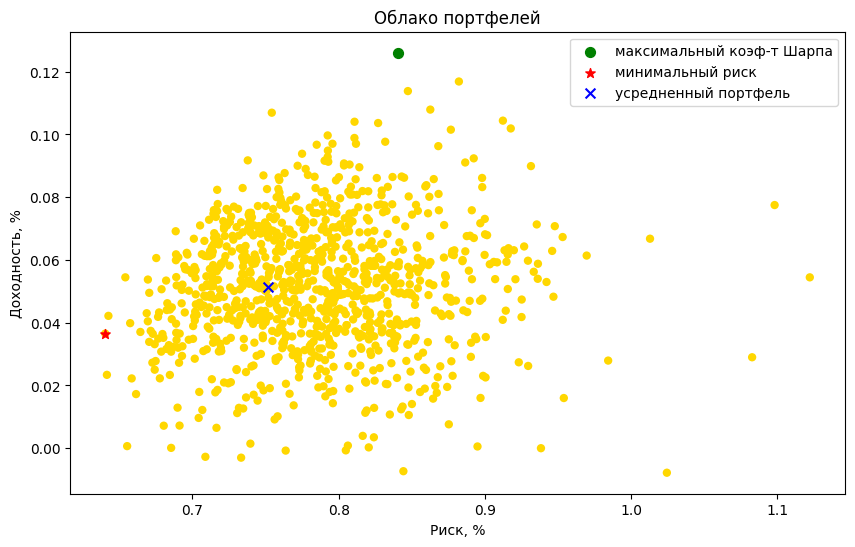

----Минимальный риск----

риск = 0.64%
доходность = 0.04%

	 доли, %

AAPL  6.3
KO    8.17
JNJ   4.49
AXP   16.53
MCD   7.23
WMT   20.98
ORCL  10.51
NKE   5.88
MSFT  2.84
CAT   17.07

----Максимальный коэф-т Шарпа----

риск = 0.84%
доходность = 0.13%

	 доли, %

AAPL  7.99
KO    13.65
JNJ   4.11
AXP   7.11
MCD   0.56
WMT   8.88
ORCL  27.44
NKE   24.53
MSFT  1.99
CAT   3.74

----Средний портфель----

риск = 0.75%
доходность = 0.05%

	 доли, %

AAPL  10.0
KO    10.0
JNJ   10.0
AXP   10.0
MCD   10.0
WMT   10.0
ORCL  10.0
NKE   10.0
MSFT  10.0
CAT   10.0


In [ ]:
x = df['Риск']*100
y = df['Доходность']*100
plt.figure(figsize=(10, 6))
plt.scatter(x, y, edgecolors='none', c='gold')
plt.scatter(x=sharp_port['Риск']*100, y=sharp_port['Доходность']*100,
            c='green', marker='o', s=50, label='максимальный коэф-т Шарпа')
plt.scatter(x=risk_port['Риск']*100, y=risk_port['Доходность']*100,
            c='red', marker='*', s=50, label='минимальный риск')
plt.scatter(x=vMeanPort*100, y=rMeanPort*100, c='blue',
            marker='x', s=50, label='усредненный портфель')
plt.xlabel("Риск, %")
plt.ylabel("Доходность, %")
plt.title("Облако портфелей")
plt.legend()
plt.show()

print(f"----Минимальный риск----\n\nриск = {round(risk_port['Риск'].values[0]*100, 2)}%")
print(f"доходность = {round(risk_port['Доходность'].values[0]*100, 2)}%\n")
print("\t доли, %\n")
for name in stocks:
  print(f"{name:<6}{round(risk_port['Вес '+name].values[0]*100, 2)}")

print(f"\n----Максимальный коэф-т Шарпа----\n\nриск = {round(sharp_port['Риск'].values[0]*100, 2)}%")
print(f"доходность = {round(sharp_port['Доходность'].values[0]*100, 2)}%\n")
print("\t доли, %\n")
for name in stocks:
  print(f"{name:<6}{round(sharp_port['Вес '+name].values[0]*100, 2)}")

print(f"\n----Средний портфель----\n\nриск = {round(vMeanPort*100, 2)}%")
print(f"доходность = {round(rMeanPort*100, 2)}%\n")
print("\t доли, %\n")
for i, s in enumerate(stocks):
  print(f"{s:<6}{round(wMeanPort[i]*100, 2)}")